# Kaggle: Titanic - Machine Learning from Disaster

ismailsavruk@gmail.com © 2022

I'll use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Dataset from: https://www.kaggle.com/competitions/titanic/data

## A. Getting Started

### Loading  Libraries

Let's start by importing necessary libraries first.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import svm 

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

%matplotlib inline

### Loading  Dataset

In [2]:
# Load dataset
titanic = pd.read_csv('Train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Dictionary


survival:	Survival	0 = No, 1 = Yes

pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex:	Sex	

Age:	Age in years	

sibsp:	# of siblings / spouses aboard the Titanic	

parch:	# of parents / children aboard the Titanic	

ticket:	Ticket number	

fare:	Passenger fare	

cabin:	Cabin number	

embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Dropping some columns

When we look at the table, I don't think, the Passanger ID, Name, Ticket no or cabin info will have an effect on survival. So we can drop them.

In [9]:
titanic_new = titanic.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
titanic_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Converting Verbal Categorical Values to Numeric Ones

Let's replace males with "0" and females with "1".

In [10]:
titanic_new['Sex'] = titanic_new['Sex'].map({'female': 1, 'male': 0})

In [11]:
titanic_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


Let's do the similar thing for "Embarked". New values would be C=0, Q=1, S=2

In [12]:
titanic_new['Embarked'] = titanic_new['Embarked'].map({'C':0, 'Q':1, 'S': 2})

In [13]:
titanic_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2.0
887,1,1,1,19.0,0,0,30.0000,2.0
888,0,3,1,NaN,1,2,23.4500,2.0
889,1,1,0,26.0,0,0,30.0000,0.0


### Rearranging Columns

Let's rearrange the column values so that Survived would be the last column.

In [14]:
titanic_new = titanic_new[['Pclass',  'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',  'Survived']]

In [15]:
titanic_new

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,2.0,0
1,1,1,38.0,1,0,71.2833,0.0,1
2,3,1,26.0,0,0,7.9250,2.0,1
3,1,1,35.0,1,0,53.1000,2.0,1
4,3,0,35.0,0,0,8.0500,2.0,0
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2.0,0
887,1,1,19.0,0,0,30.0000,2.0,1
888,3,1,NaN,1,2,23.4500,2.0,0
889,1,0,26.0,0,0,30.0000,0.0,1


### Handling Missing Values

In [16]:
# descriptions
titanic_new.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.535433,0.383838
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


As you see, age count is significantly less than other values. There must be several NaN values. Similarly, Embarked count is 2 less than other columns, so there must be 2 NaN values.
Let's replace NaN values. Let's start with Embarked column. Since it has categorical values, we can use "Mode" to replace NaN values.

In [17]:
titanic_new.Embarked.mode()

0    2.0
dtype: float64

In [18]:
titanic_new['Embarked'] = titanic_new['Embarked'].fillna(2)

In [19]:
titanic_new.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.536476,0.383838
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.791503,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


Now Embarked count is 891. Let's check the Age column.

### Handling Missing Age Values

In [21]:
#listing the Null Age values
titanic_new[pd.isnull(titanic_new['Age'])]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
5,3,0,NaN,0,0,8.4583,1.0,0
17,2,0,NaN,0,0,13.0000,2.0,1
19,3,1,NaN,0,0,7.2250,0.0,1
26,3,0,NaN,0,0,7.2250,0.0,0
28,3,1,NaN,0,0,7.8792,1.0,1
...,...,...,...,...,...,...,...,...
859,3,0,NaN,0,0,7.2292,0.0,0
863,3,1,NaN,8,2,69.5500,2.0,0
868,3,0,NaN,0,0,9.5000,2.0,0
878,3,0,NaN,0,0,7.8958,2.0,0


Since age values are numerical, we can use Mean value to replace all NaN values. However, that might be the smartest way. Instead, we can try to guess ages based on the other given values like Sex, Pclass, Embarked info. Then, we can calculate the mean values of each subcategory and replace it with the corresponing null age values.

Let's create a DataFrame to fill missing age values as described above.

In [22]:
fill_age = titanic_new[["Pclass", "Sex", "Embarked", "Age"]].groupby(["Pclass", "Sex", "Embarked"], as_index=False).mean().round(0)
fill_age

,Pclass,Sex,Embarked,Age
0,1,0,0.0,40.0
1,1,0,1.0,44.0
2,1,0,2.0,42.0
3,1,1,0.0,36.0
4,1,1,1.0,33.0
5,1,1,2.0,33.0
6,2,0,0.0,26.0
7,2,0,1.0,57.0
8,2,0,2.0,31.0
9,2,1,0.0,19.0


We have 18 different subcategories to fill null age values.

In [23]:
for p in [1,2,3]:
    for s in [0,1]:    
        for e in [0,1,2]:
            titanic_new.loc[(titanic_new['Pclass']==p) & (titanic_new['Sex']==s) & (titanic_new['Embarked']==e) & (pd.isnull(titanic_new['Age'])), ['Age']] = fill_age.loc[(fill_age['Pclass']==p) & (fill_age['Sex']==s) & (fill_age['Embarked']==e), ['Age']].values

Let's see if it worked.

In [24]:
titanic_new[pd.isnull(titanic_new['Age'])]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


Now, we do not have any Null values, so it worked!

In [25]:
titanic_new.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.344747,0.523008,0.381594,32.204208,1.536476,0.383838
std,0.836071,0.477990,13.310033,1.102743,0.806057,49.693429,0.791503,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


Great! All of the features have 891 counts!

## B. Visualization

Let's see the correlation matrix

In [26]:
#correlation matrix
titanic_new.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,-0.131900,-0.404714,0.083081,0.018443,-0.549500,0.162098,-0.338481
Sex,-0.131900,1.000000,-0.115370,0.114631,0.245489,0.182333,-0.108262,0.543351
Age,-0.404714,-0.115370,1.000000,-0.247817,-0.183515,0.117867,0.002351,-0.069609
SibSp,0.083081,0.114631,-0.247817,1.000000,0.414838,0.159651,0.068230,-0.035322
Parch,0.018443,0.245489,-0.183515,0.414838,1.000000,0.216225,0.039798,0.081629
Fare,-0.549500,0.182333,0.117867,0.159651,0.216225,1.000000,-0.224719,0.257307
Embarked,0.162098,-0.108262,0.002351,0.068230,0.039798,-0.224719,1.000000,-0.167675
Survived,-0.338481,0.543351,-0.069609,-0.035322,0.081629,0.257307,-0.167675,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

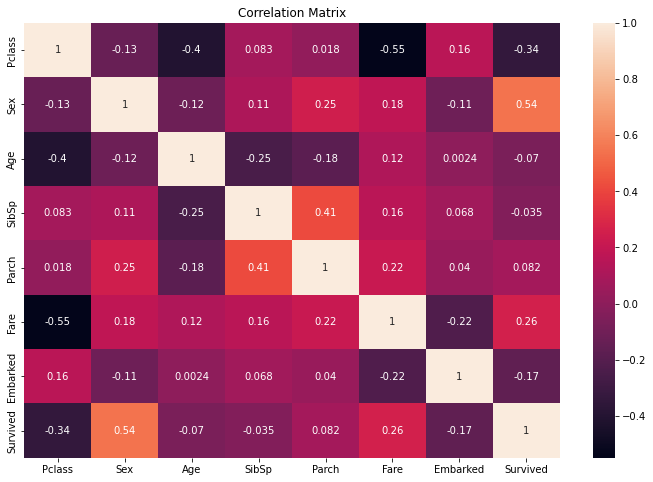

In [27]:
#seaborn package
import seaborn as sns
plt.rcParams["figure.figsize"]=(12,8)# Custom figure size in inches
sns.heatmap(titanic_new.corr(), annot=True)
plt.title("Correlation Matrix")

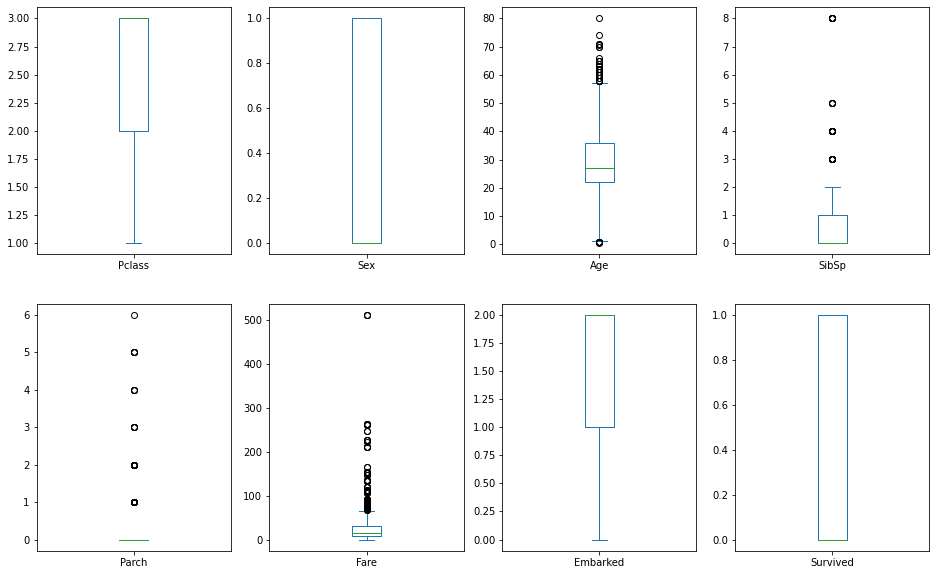

In [32]:
# box and whisker plots
titanic_new.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=[16,10])
plt.show()

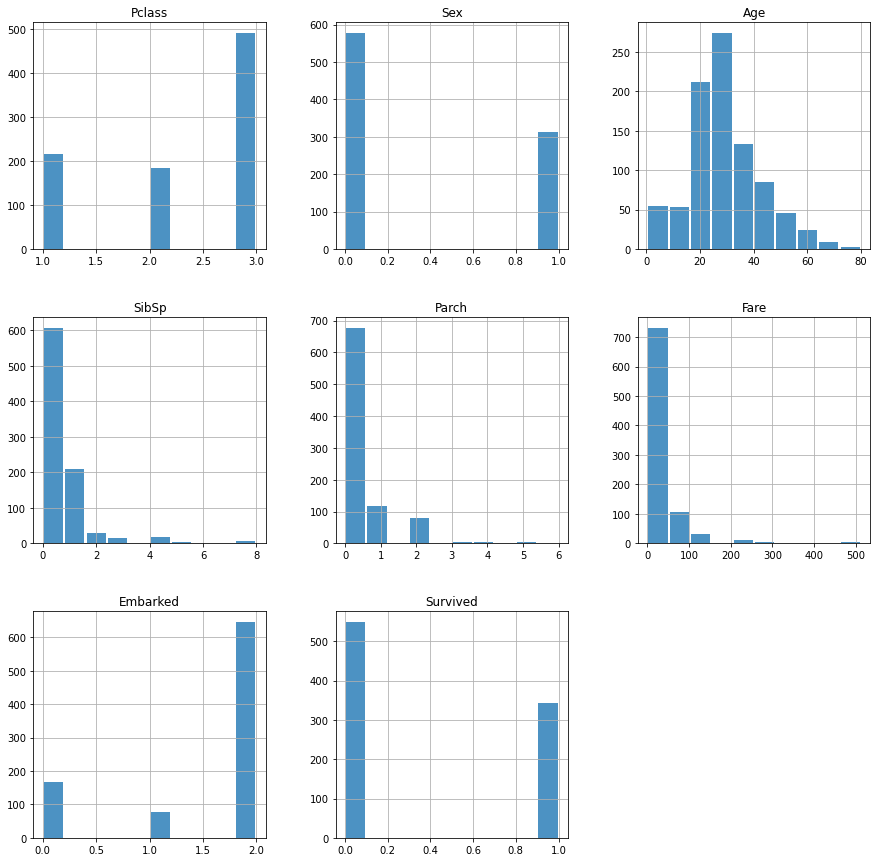

In [33]:
# histogram
titanic_new.hist(alpha=0.8, rwidth=0.9, figsize=[15,15])
plt.show()

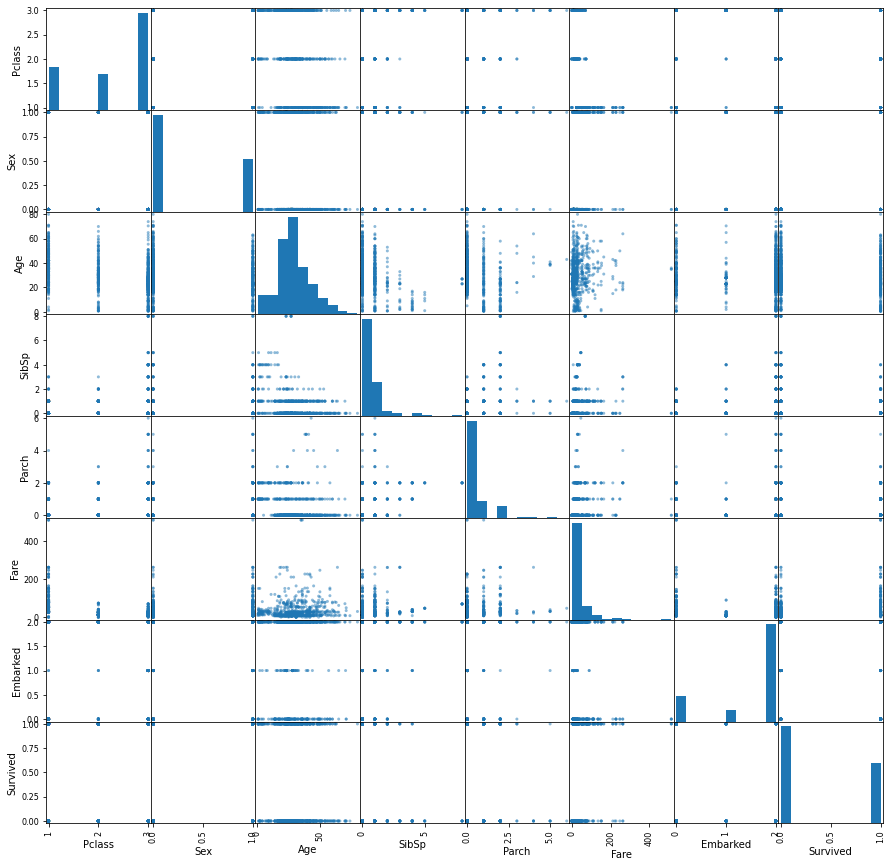

In [34]:
# scatter plot matrix
scatter_matrix(titanic_new, figsize=[15,15])
plt.show()

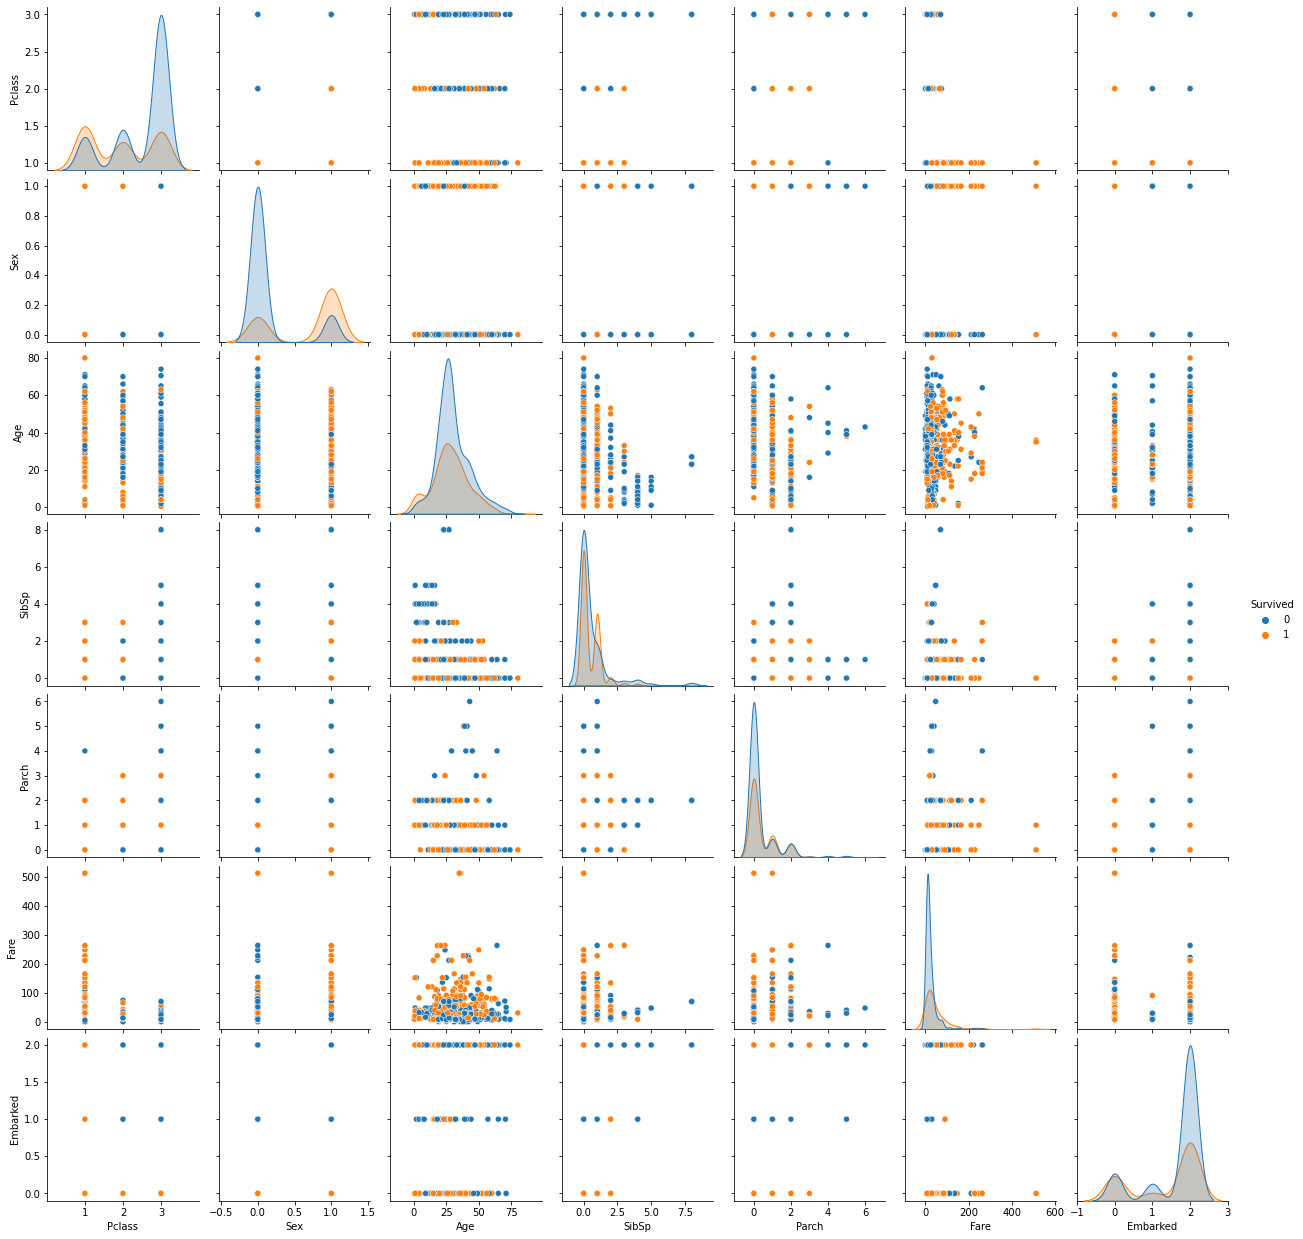

In [35]:
sns.pairplot(titanic_new, hue='Survived')
plt.show()

In [141]:
counts=titanic_new.groupby(['Survived','Sex'])['Survived'].count().values

In [146]:
label = ['Male Not-Survived','Female Not-Survived','Male Survived','Female Survived']

In [147]:
plt.rcParams['figure.figsize'] = [6,6]  # the whole figure
plt.rcParams["axes.titlesize"] = 20     # for the top title
plt.rcParams["xtick.labelsize"] = 15    # for lables
plt.rcParams["font.size"] = 20          # for percentages

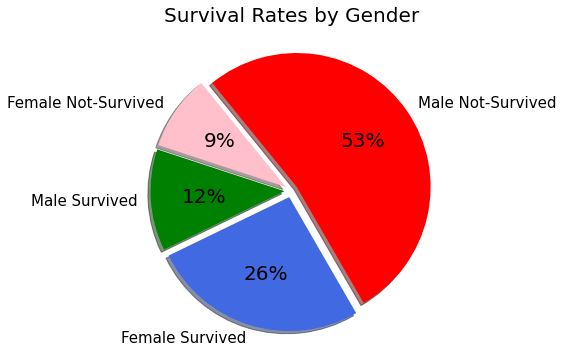

In [148]:
explode = [0.05]*len(counts)
colors = ['red','pink','green','royalblue']
plt.title("Survival Rates by Gender")
plt.axis("equal")
plt.pie(counts, labels=label, autopct='%1.0f%%', startangle=-60, explode=explode, colors = colors, shadow=True)
plt.plot();

## C. Modeling

Now it is time to create some models for the data and estimate their accuracy on unseen data.

Let's split our train and test data. I'll use 80/20 ratio. (train/test)

I'll also fix the random state to some number so that we generate the same results every time.

In [149]:
#This is our X values, and the last column will be th target values, Y.
X = titanic_new.iloc[:,:-1]
Y = titanic_new.iloc[:,-1]

In [150]:
#Split the data
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, train_size=0.8, random_state=42)

In [151]:
print('# of Test cases : ', len(X_test), '\n# of Train cases: ', len(X_train))

# of Test cases :  179 
# of Train cases:  712


## 1. Gaussian Naive Bayes

This will be our first model.

In [152]:
#clf_1 means the first classifier.
clf_1 = GaussianNB()

In [153]:
#we're using 10-fold cross validation
accuracy_1_train = cross_val_score(clf_1, X_train, Y_train, scoring='accuracy', cv = 10)
print(accuracy_1_train)

#get the mean of accuracy scores
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_1_train.mean()))

[0.86111111 0.79166667 0.69014085 0.92957746 0.83098592 0.76056338
 0.73239437 0.76056338 0.69014085 0.87323944]

 Average accuracy of the model on the training data is: 79%


The score is not that good. Let's see the score on the test data.

In [154]:
#Let's fit the model
clf_1.fit(X_train, Y_train)

#Let's get the predictions on the test data first.
Y_pred_1 = clf_1.predict(X_test)

In [155]:
accuracy_1_test = accuracy_score(Y_pred_1, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_1_test))

Accuracy on the test data: 78%


Let's take a look at the confusion matrix.

Confusion Matrix:
[[82 23]
 [17 57]]


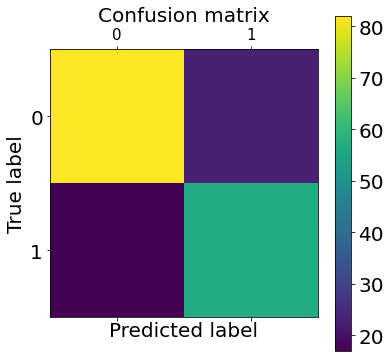

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [156]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred_1)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(Y_test, Y_pred_1))

Out of 74 survived, we predict 57 correctly. Out of 105 not survived, we predict 82 of them correctly.

## 2. Logistic Regresssion

Now, let's try logistic regression.

In [157]:
clf_2 = linear_model.LogisticRegression(C=1e5)
clf_2.fit(X_train, Y_train)
Y_pred_2 = clf_2.predict(X_test)

C:\Users\ismai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We are getting Convergence Warning: lbfgs failed to converge. "TOTAL NO. of ITERATIONS REACHED LIMIT." To fix this, we have couple of options.

  1) Increase the max no. of iterations. Default max_iter=100, but we can try different numbers like 200, 300, etc.
  
  2) We can use a different solver. Default solver='lbfgs'. But we 4 more solvers {‘newton-cg’, ‘liblinear’, ‘sag’, ‘saga’}
  
  3) We can also try normalizing the data using standard scaler.

Let's start with the 1st option.

In [158]:
clf_2 = linear_model.LogisticRegression(C=1e5, max_iter=500)

We tried 200, 300, and 400 but it didn't work. 500 did not give us any warning.

In [159]:
#we're using 10-fold cross validation
accuracy_2 = cross_val_score(clf_2, X_train, Y_train, scoring='accuracy', cv = 10)
print(accuracy_2)

#get the mean of accuracy scores 
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_2.mean()))

[0.84722222 0.79166667 0.71830986 0.92957746 0.84507042 0.73239437
 0.74647887 0.71830986 0.73239437 0.92957746]

 Average accuracy of the model on the training data is: 80%


In [160]:
#Let's fit the model
clf_2.fit(X_train, Y_train)

#Let's get the predictions on the test data first.
Y_pred_2 = clf_2.predict(X_test)

In [161]:
accuracy_2 = accuracy_score(Y_pred_2, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_2))

Accuracy on the test data: 82%


The accuracy is a little bit more than Gaussian NB but still low.

Let's use different solvers, the 2nd option.

In [162]:
clf_2 = linear_model.LogisticRegression(C=1e5, solver='liblinear')

solver='sag' or 'saga' was still giving a warning. But, newton-cg or liblinear seems fine.

In [163]:
accuracy_2 = cross_val_score(clf_2, X_train, Y_train, scoring='accuracy', cv = 10)
print(accuracy_2)

print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_2.mean()))

[0.84722222 0.79166667 0.71830986 0.92957746 0.84507042 0.73239437
 0.74647887 0.71830986 0.73239437 0.92957746]

 Average accuracy of the model on the training data is: 80%


In [164]:
clf_2.fit(X_train, Y_train)
Y_pred_2 = clf_2.predict(X_test)

In [165]:
accuracy_2 = accuracy_score(Y_pred_2, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_2))

Accuracy on the test data: 82%


All of the scores are the same!

Let's use the last option: normalizing the data using standard scaler. We'll see it will increase the accuracy or not.

In [166]:
#We'll make a pipeline first.
clf_2 = make_pipeline(StandardScaler(), linear_model.LogisticRegression(C=1e5))

We didn't get any warning, that's good.

In [167]:
accuracy_2 = cross_val_score(clf_2, X_train, Y_train, scoring='accuracy', cv = 10)
print(accuracy_2)

#get the mean of accuracy scores 
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_2.mean()))

[0.84722222 0.79166667 0.71830986 0.92957746 0.84507042 0.73239437
 0.74647887 0.71830986 0.73239437 0.92957746]

 Average accuracy of the model on the training data is: 80%


In [168]:
clf_2.fit(X_train, Y_train)
Y_pred_2 = clf_2.predict(X_test)

In [169]:
accuracy_2 = accuracy_score(Y_pred_2, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_2))

Accuracy on the test data: 82%


Same score everywhere! So, any one of the three options can be used.

Let's see the confusion matrix of the test data.

Confusion Matrix:
[[92 13]
 [19 55]]


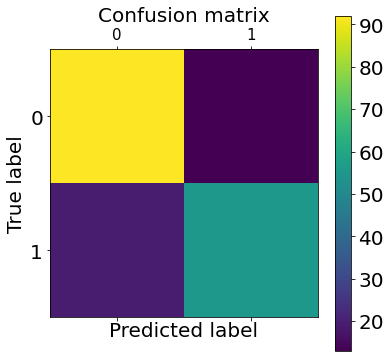

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [170]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred_2)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(Y_test, Y_pred_2))

A little bit of improvement: Out of 74 survived, we predict 55 correctly. Out of 105 not survived, we predict 92 of them correctly.

## 3. SVC (Support Vector Classifier) Models

We will try out 4 different SVM models:

"LinearSVC"......"SVC with linear kernel"......"SVC with quadratic polynomial kernel"......"SVC with RBF kernel"

### 3.1 Linear SVC

In [171]:
C = 1.0   # regularization parameter

clf_3_1 = svm.LinearSVC(C=C, dual=False)

In [172]:
accuracy_3_1 = cross_val_score(clf_3_1, X_train, Y_train, scoring='accuracy', cv = 10)
print(accuracy_3_1)

print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_3_1.mean()))

[0.83333333 0.77777778 0.71830986 0.94366197 0.83098592 0.70422535
 0.77464789 0.71830986 0.77464789 0.92957746]

 Average accuracy of the model on the training data is: 80%


In [173]:
clf_3_1.fit(X_train, Y_train)
Y_pred_3_1 = clf_3_1.predict(X_test)

accuracy_3_1 = accuracy_score(Y_pred_3_1, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_3_1))

Accuracy on the test data: 80%


### 3.2 SVC with Linear Kernel

In [174]:
clf_3_2 = svm.SVC(kernel="linear", C=C)

In [175]:
accuracy_3_2 = cross_val_score(clf_3_2, X_train, Y_train, scoring = "accuracy", cv=10)
print(accuracy_3_2)
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_3_2.mean()))

[0.83333333 0.75       0.69014085 0.94366197 0.81690141 0.67605634
 0.73239437 0.76056338 0.76056338 0.88732394]

 Average accuracy of the model on the training data is: 79%


In [176]:
clf_3_2.fit(X_train, Y_train)
Y_pred_3_2 = clf_3_2.predict(X_test)

accuracy_3_2 = accuracy_score(Y_pred_3_2, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_3_2))

Accuracy on the test data: 78%


### 3.3 SVC with Quadratic Polynomial Kernel

In [177]:
clf_3_3 = svm.SVC(kernel="poly", degree=2, C=C)

In [178]:
accuracy_3_3 = cross_val_score(clf_3_3, X_train, Y_train, scoring = "accuracy", cv=10)
print(accuracy_3_3)
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_3_3.mean()))

[0.68055556 0.68055556 0.69014085 0.66197183 0.63380282 0.66197183
 0.63380282 0.64788732 0.61971831 0.66197183]

 Average accuracy of the model on the training data is: 66%


In [179]:
clf_3_3.fit(X_train, Y_train)
Y_pred_3_3 = clf_3_3.predict(X_test)

accuracy_3_3 = accuracy_score(Y_pred_3_3, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_3_3))

Accuracy on the test data: 64%


### 3.4 SVC with RBF (Radial Basis Function) Kernel

In [180]:
clf_3_4 = svm.SVC(kernel='rbf')

In [181]:
accuracy_3_4 = cross_val_score(clf_3_4, X_train, Y_train, scoring= "accuracy", cv=10)
print(accuracy_3_4)
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_3_4.mean()))

[0.69444444 0.68055556 0.69014085 0.70422535 0.64788732 0.63380282
 0.64788732 0.64788732 0.61971831 0.70422535]

 Average accuracy of the model on the training data is: 67%


In [182]:
clf_3_4.fit(X_train, Y_train)
Y_pred_3_4 = clf_3_4.predict(X_test)

accuracy_3_4 = accuracy_score(Y_pred_3_4, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_3_4))

Accuracy on the test data: 66%


## 4. Decision Tree Classifier

In [183]:
clf_4 = DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.6, splitter='best')

In [184]:
accuracy_4 = cross_val_score(clf_4, X_train, Y_train, scoring= "accuracy", cv=10)
print(accuracy_4)
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_4.mean()))

[0.81944444 0.77777778 0.73239437 0.91549296 0.88732394 0.70422535
 0.81690141 0.81690141 0.76056338 0.91549296]

 Average accuracy of the model on the training data is: 81%


In [185]:
clf_4.fit(X_train, Y_train)

Y_pred_4 = clf_4.predict(X_test)

accuracy_4 = accuracy_score(Y_pred_4, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_4))

Accuracy on the test data: 80%


## 5. Random Forest Classifier

In [186]:
clf_5 = RandomForestClassifier(n_estimators=100, random_state=100)

In [187]:
accuracy_5 = cross_val_score(clf_5, X_train, Y_train, scoring= "accuracy", cv=10)
print(accuracy_5)
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_5.mean()))

[0.81944444 0.77777778 0.74647887 0.84507042 0.84507042 0.76056338
 0.77464789 0.77464789 0.81690141 0.84507042]

 Average accuracy of the model on the training data is: 80%


In [188]:
clf_5.fit(X_train, Y_train)

Y_pred_5 = clf_5.predict(X_test)

accuracy_5 = accuracy_score(Y_pred_5, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_5))

Accuracy on the test data: 83%


## 6. Linear Discriminant Analysis (LDA)

In [189]:
clf_6 = LinearDiscriminantAnalysis()

In [190]:
accuracy_6 = cross_val_score(clf_6, X_train, Y_train, scoring= "accuracy", cv=10)
print(accuracy_6)
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_6.mean()))

[0.80555556 0.77777778 0.71830986 0.94366197 0.83098592 0.67605634
 0.77464789 0.73239437 0.76056338 0.92957746]

 Average accuracy of the model on the training data is: 79%


In [191]:
clf_6.fit(X_train, Y_train)

Y_pred_6 = clf_6.predict(X_test)

accuracy_6 = accuracy_score(Y_pred_6, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_6))

Accuracy on the test data: 79%


## 7. KNN

In [192]:
clf_7 = KNeighborsClassifier(n_neighbors=6)

In [193]:
accuracy_7 = cross_val_score(clf_7, X_train, Y_train, scoring= "accuracy", cv=10)
print(accuracy_7)
print("\n Average accuracy of the model on the training data is: {0:.0%}".format(accuracy_7.mean()))

[0.63888889 0.66666667 0.67605634 0.73239437 0.74647887 0.70422535
 0.61971831 0.70422535 0.63380282 0.73239437]

 Average accuracy of the model on the training data is: 69%


In [194]:
clf_7.fit(X_train, Y_train)

Y_pred_7 = clf_7.predict(X_test)

accuracy_7 = accuracy_score(Y_pred_7, Y_test)

print("Accuracy on the test data: {0:.0%}".format(accuracy_7))

Accuracy on the test data: 75%


## D. Test Data and Submissions

In [195]:
titanic_test = pd.read_csv('Test.csv')

In [196]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Let's fill out the missing Fare value with mean

In [201]:
titanic_test.Fare.mean()

35.6271884892086

In [202]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(35.62)

Let's convert nonnumeric categorical values to numeric ones.

In [204]:
titanic_test['Sex'] = titanic_test['Sex'].map({'female': 1, 'male': 0})

In [205]:
titanic_test['Embarked'] = titanic_test['Embarked'].map({'C':0, 'Q':1, 'S': 2})

In [207]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,2


We will use the same method above to fill out missing age values.

In [356]:
fill_age_test = titanic_test[["Pclass", "Sex", "Embarked", "Age"]].groupby(["Pclass", "Sex", "Embarked"], as_index=False).mean().round(0)
fill_age_test

,Pclass,Sex,Embarked,Age
0,1,0,0,40.0
1,1,0,2,41.0
2,1,1,0,41.0
3,1,1,1,37.0
4,1,1,2,42.0
5,2,0,0,29.0
6,2,0,1,53.0
7,2,0,2,30.0
8,2,1,0,20.0
9,2,1,2,25.0


In [357]:
for p in [1,2,3]:
    for s in [0,1]:    
        for e in [0,1,2]:
            titanic_test.loc[(titanic_test['Pclass']==p) & (titanic_test['Sex']==s) & (titanic_test['Embarked']==e) & (pd.isnull(titanic_test['Age'])), ['Age']] = fill_age_test.loc[(fill_age_test['Pclass']==p) & (fill_age_test['Sex']==s) & (fill_age_test['Embarked']==e), ['Age']].values

Let's see if it worked or not.

In [358]:
titanic_test[pd.isnull(titanic_test['Age'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [359]:
titanic_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.470096,0.447368,0.392344,35.627171,1.401914
std,120.810458,0.841838,0.481622,13.031378,0.896760,0.981429,55.840500,0.854496
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,3.000000,1.000000,36.875000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


It worked. Now let's rearrange columns.

In [360]:
titanic_test_X = titanic_test[['Pclass',  'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [361]:
titanic_test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,0,25.0,0,0,8.0500,2
414,1,1,39.0,0,0,108.9000,0
415,3,0,38.5,0,0,7.2500,2
416,3,0,25.0,0,0,8.0500,2


I made 7 submissions, one for each model.

In [ ]:
#Gaussioan NB 75%
titanic_test_Y_pred_1 = clf_1.predict(titanic_test_X)
#Logistic Regression 76%
titanic_test_Y_pred_2 = clf_2.predict(titanic_test_X)
#Linear SVC 76%
titanic_test_Y_pred_3 = clf_3_1.predict(titanic_test_X)
#Decision Tree 77%
titanic_test_Y_pred_4 = clf_4.predict(titanic_test_X)
#Random Forest 76%
titanic_test_Y_pred_5 = clf_5.predict(titanic_test_X)
#LDA 76%
titanic_test_Y_pred_6 = clf_6.predict(titanic_test_X)
#KNN 65%
titanic_test_Y_pred_7 = clf_7.predict(titanic_test_X)

The higest score one was the decision tree.

In [398]:
titanic_test_Y_pred_4 = clf_4.predict(titanic_test_X)

In [399]:
titanic_test_Y_pred_4

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [400]:
submission_df_4 = pd.DataFrame({
                  "PassengerId": titanic_test['PassengerId'], 
                  "Survived": titanic_test_Y_pred_4})
submission_df_4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [401]:
submission_df_4.to_csv('submission_4.csv', index=False)

I hope this code helps. My  submission to the competition site Kaggle results in scoring 4,259 of 13,892 competition entries.